# Student Stress Factors Analysis

DATA 201 Final Presentation

Anushka Pandey, Amos Trinidad Gonzalez, Isabel Hansmann Cañas

In [374]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import ML Modules
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from pandas.plotting import parallel_coordinates
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import decomposition
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, accuracy_score
from scipy import stats
from sklearn.decomposition import PCA

**Data Summary, according to dataset creator, user Chhabii**

**Demographics:** Survey on students aged 15-25 (Typical High School & University Age) in Dharan, Nepal

1. **Anxiety Level** - Ranges from 0-21, measured as GAD-7

&emsp;&emsp;Generalized Anxiety Disorder (GAD-7) measure covers 7 items which are scored from 0-3. Ratings are considered to be 5-9 for mild, 10-14 for moderate, and 15-21 for severe anxiety levels.
    
2. **Self-Esteem** - Ranges 0-30 on the Rosenberg Self Esteem Scale (RSE)

&emsp;&emsp; RSE scorings between 15-25 are within 'normal' range, while scores <15 suggest low self-esteem, according to a responses for a series of personal questions.
    
3. **Mental Health History** - Binary 0/1

&emsp;&emsp;0 for no mental health history, 1 for having a mental health history
    
4.  **Depression** - Range 0-27, measured on Patient Health Questionnaire (PHQ-9)
&emsp;&emsp;1-4 considered minimal, 5-9 mild, 10-14 moderate, 15-19 moderately severe, and 20-27 severe depression.

Remaining 16 features (not including the ordinal target variable for Stress Levels, which ranges 0-2 in ascending severity) generally demonstrate a low to mid to high rating. For instance, from 0-5 with 0-1 low, 2-3 mid, and 4-5 high value.

In [285]:
#Import Student Stress Factors Dataset
df = pd.read_csv('StressLevelDataset.csv')

# Exploratory Data Analysis (EDA)

In [286]:
#Dataset Preview
display(df.head())
display(df.info())

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

None

In [287]:
#Number of Students
num_students = len(df)
print('Total Number of Students: ',num_students)

#Anxiety level mean
average_stress_levels = df['anxiety_level'].mean().round(2)
print('Average Stress Levels: ', average_stress_levels)

#Number of students with mental health history
students_with_mental_health_history = df[df['mental_health_history'] == 1]
num_students_with_mental_health_history = len('students_with_mental_history')
print('Students with Mental Health History Count: ', num_students_with_mental_health_history)

#Number of students with depression
students_with_depression = df[df['depression'] == 1]
num_students_with_depression = len('students_with_depression')
print('Number of Students with Depression:', num_students_with_depression)




Total Number of Students:  1100
Average Stress Levels:  11.06
Students with Mental Health History Count:  28
Number of Students with Depression: 24


This is preliminary work to understand the general demographics of the dataset and the students involved

In [288]:
#Define relevant factors
psychological_factors = ['anxiety_level', 'self_esteem', 'depression', 'mental_health_history']
physiological_factors = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_factors = ['noise_level', 'living_conditions', 'basic_needs', 'safety']
academic_factors = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_factors = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

The motivation for grouping the features is to understand what general categories the features fall under. This will allow us to better understand wich variables contribute to student stress.
The five main groups that we categorized are psychological, physiological, environmental, academic, and social factors. Beneath each category are sub variables that are related to the one of the five categories.


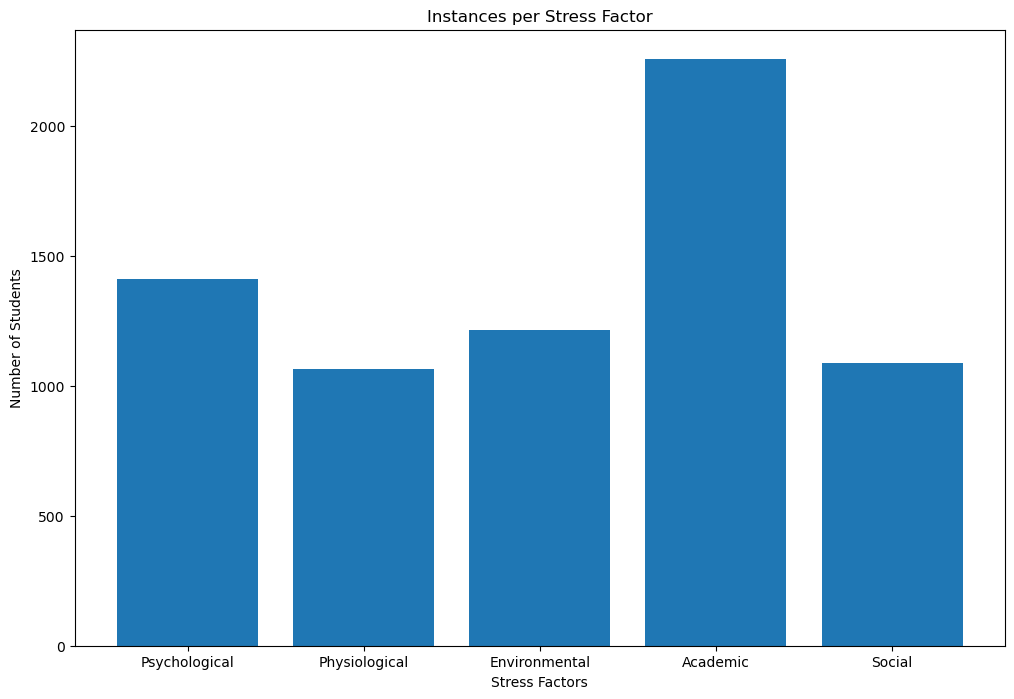

In [289]:
#Calculate the number of students with negative experiences or conditions for each factor

num_students_with_negative_psychological = df[psychological_factors].apply(lambda x: x.lt(3).sum(), axis=1)
num_students_with_negative_physiological = df[physiological_factors].apply(lambda x: x.gt(3).sum(), axis=1)
num_students_with_negative_environmental = df[environmental_factors].apply(lambda x: x.gt(3).sum(), axis=1)
num_students_with_negative_academic = df[academic_factors].apply(lambda x: x.lt(3).sum(), axis=1)
num_students_with_negative_social = df[social_factors].apply(lambda x: x.gt(3).sum(), axis=1)

factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']

negative_experiences = [
    num_students_with_negative_psychological.sum(),
    num_students_with_negative_physiological.sum(),
    num_students_with_negative_environmental.sum(),
    num_students_with_negative_academic.sum(),
    num_students_with_negative_social.sum(),
]

#Bar Chart showing the number of students in each stress category
plt.figure(figsize = (12,8))
plt.bar(x = factors, height = negative_experiences)
plt.title('Instances per Stress Factor')
plt.xlabel('Stress Factors')
plt.ylabel('Number of Students')
plt.show()

Here we wanted to get an understanding of the spread the student body and see which stress factors are the most prevalent. It seems that academic-related stress factors is the biggest concern among students.

In [290]:
#Physiological Factors

# Quantifies students experiencing headaches
students_experiencing_frequent_headaches = df[df['headache'] == 1]
num_students_experiencing_frequent_headaches = len(students_experiencing_frequent_headaches)

#Average blood pressure (bp) among students
mean_blood_pressure = df['blood_pressure'].mean().round(2)
students_above_mean_blood_pressure = df[df['blood_pressure'] < 3]

#Quantifies students with above average bp
num_students_above_mean_blood_pressure = len(students_above_mean_blood_pressure)
percentage_students_with_blood_pressure_above_mean = (num_students_above_mean_blood_pressure / num_students) * 100

threshold = 10
(df['blood_pressure'] > threshold).astype(int)
if 'num_students' not in locals ():
    num_students = len(df)

#Quantifies poor sleep quality reports per student
students_with_poor_sleep_quality = df[df['sleep_quality']< 3]
num_students_with_poor_sleep_quality = len(students_with_poor_sleep_quality)
percentage_students_experiencing_poor_sleep =( num_students_with_poor_sleep_quality / num_students) * 100

threshold = 10
(df['sleep_quality'] > threshold).astype(int)
if 'num_students' not in locals ():
    num_students = len(df)

#Quantifies students with breathing problems
num_students_with_breathing_problems = df['breathing_problem'].sum()

print('Number of students experiencing headaches:', num_students_experiencing_frequent_headaches)
print('Average blood pressure among students: ', mean_blood_pressure)
print('Students with blood pressure above the mean: ',num_students_above_mean_blood_pressure)
print(f'Percentage of students with blood pressure above the mean: {percentage_students_with_blood_pressure_above_mean:.2f}%')
print('Number of students with poor sleep quality:', num_students_with_poor_sleep_quality)
print(f'Percentage of students experiencing poor sleep: {percentage_students_experiencing_poor_sleep:.2f}%')


Number of students experiencing headaches: 331
Average blood pressure among students:  2.18
Students with blood pressure above the mean:  600
Percentage of students with blood pressure above the mean: 54.55%
Number of students with poor sleep quality: 550
Percentage of students experiencing poor sleep: 50.00%


In [291]:
#Environmental Factors
#Ie. noise_level, living_conditions, basic_needs

#Quantifies students living in high noise level conditions
students_in_high_noise_places = len(df[df['noise_level'] > 3])

#Quantifies students reporting feeling unsafe
threshold_for_safety = 2
feeling_unsafe=(df['safety'] <= threshold_for_safety).astype(int)
percentage_students_feeling_unsafe = (feeling_unsafe.sum() / num_students) * 100

#Quantifies students reporting no access to basic needs
students_without_basic_needs = len(df[df['basic_needs'] == 0])

print('Number of students living in high noise places:', students_in_high_noise_places)
print(f'Percentage of students feeling unsafe: {percentage_students_feeling_unsafe:.2f}%')
print(f'Number of students without basic needs:', students_without_basic_needs)

Number of students living in high noise places: 274
Percentage of students feeling unsafe: 51.36%
Number of students without basic needs: 40


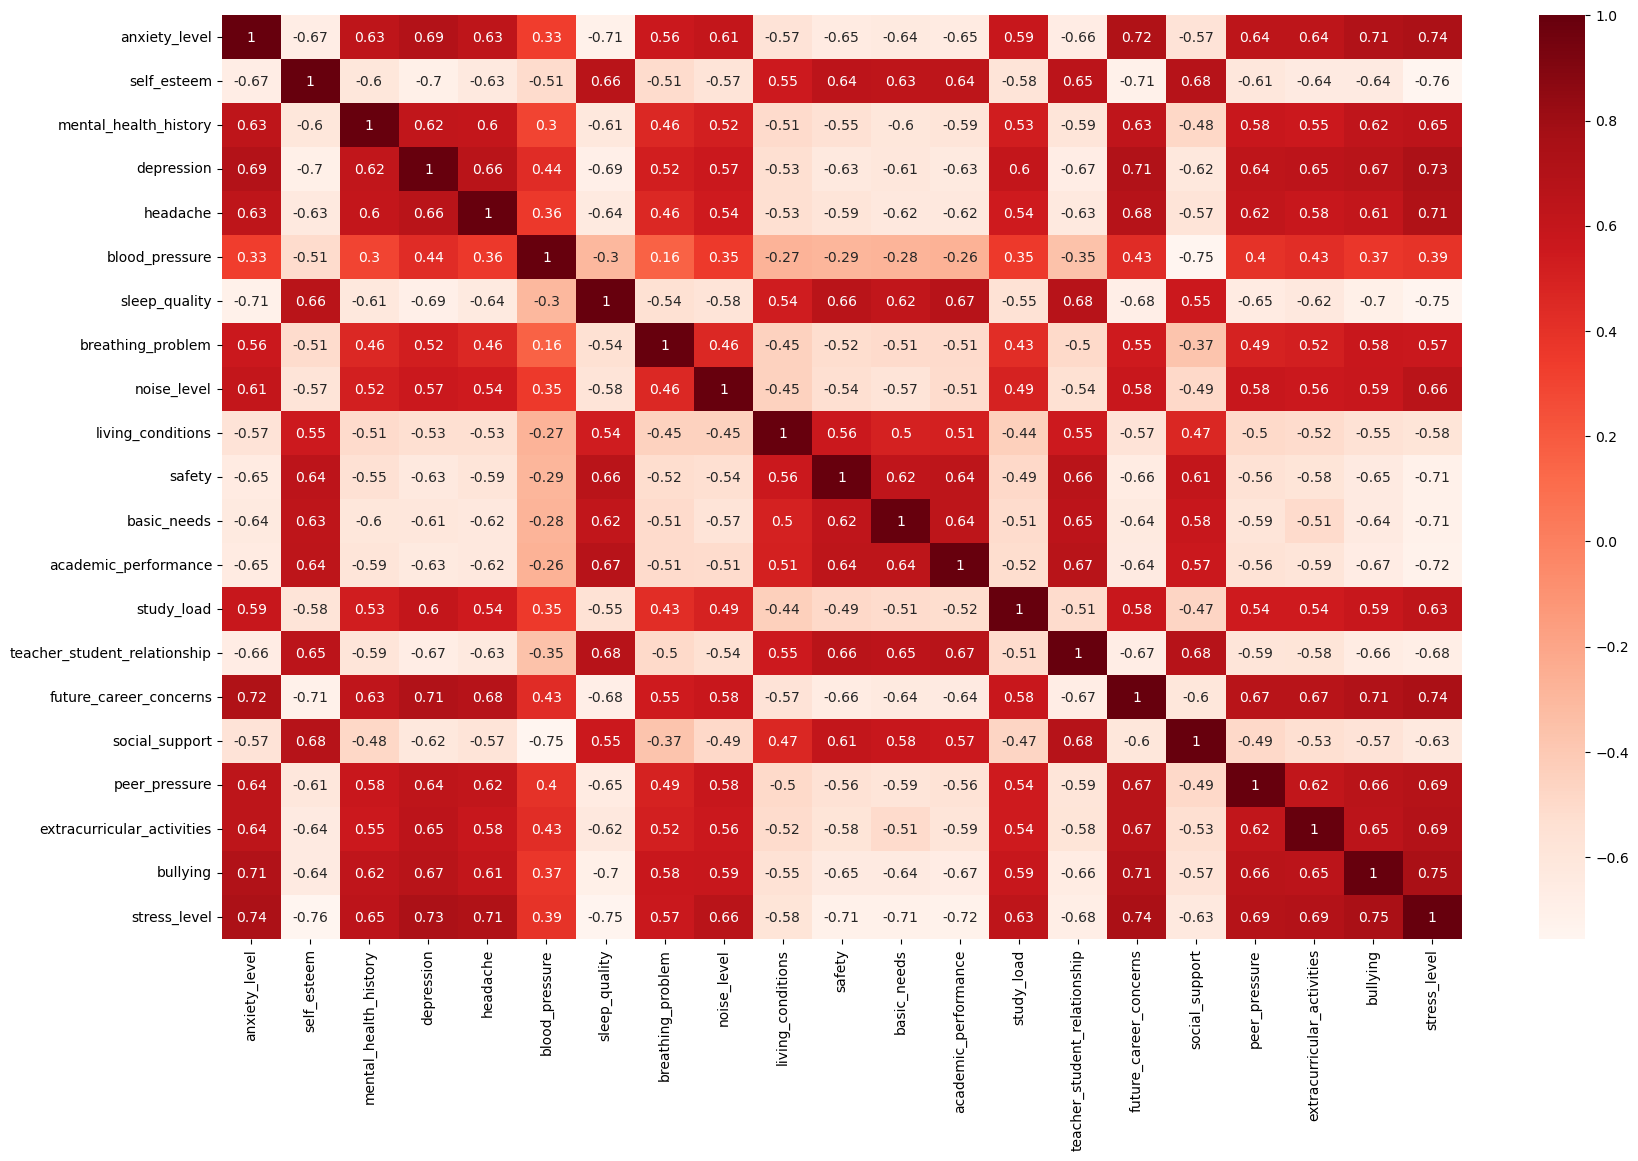

In [365]:
# Creating a correlation matrix to see the strength of relationships between variables
corr_matrix = df.corr()
plt.figure(figsize = (20, 12))
sns.heatmap(corr_matrix, cbar = True, annot = True, cmap = 'Reds')
plt.show()

Based on the above correlation matrix, we can assess the correlations strength between different variables.
The vairbales that indicate a positive correlation include the following:
- Bullying vs. stress
- Anxiety vs. stress 
- Anxiety vs. future career concerns
- Depression vs. future carer concerns
- Safety vs. academic performance
- Safety vs. sleep quality
- stress level vs. stress level
- stress level vs depression
- stres level vs headache
The variables that indicate a negative correlation include the following:
- self esteem vs. depression
- self esteem vs. stres level
- sleep quality vs. depression
- sleep qualiuty vs. anxiety level

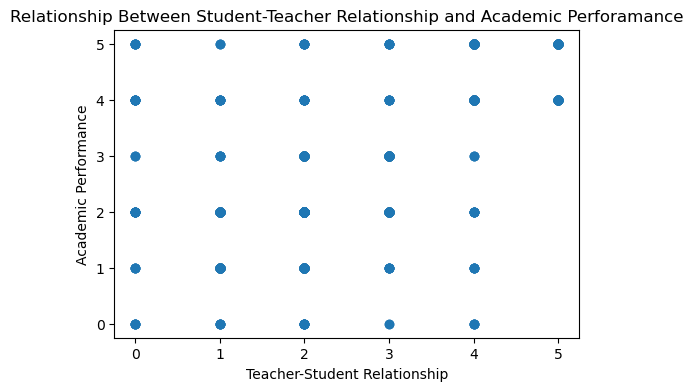

<Axes: xlabel='teacher_student_relationship', ylabel='Count'>

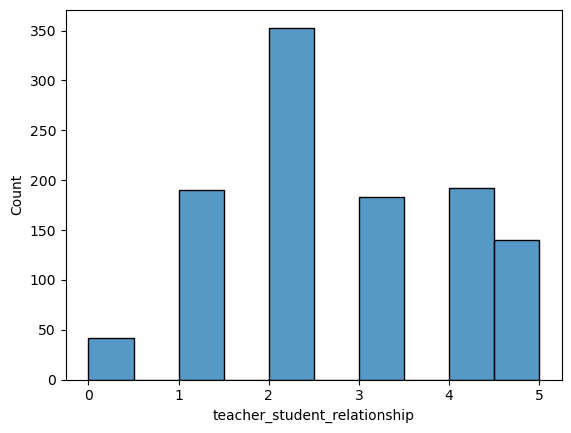

In [381]:
#Teacher-Student Relationship Effect on Academic Performance
plt.figure(figsize = (6,4))
plt.scatter(x = 'teacher_student_relationship', y = 'academic_performance', data = df)
plt.xlabel('Teacher-Student Relationship')
plt.ylabel('Academic Performance')
plt.title('Relationship Between Student-Teacher Relationship and Academic Perforamance')
plt.show()

sns.histplot(df.teacher_student_relationship, bins = 10)

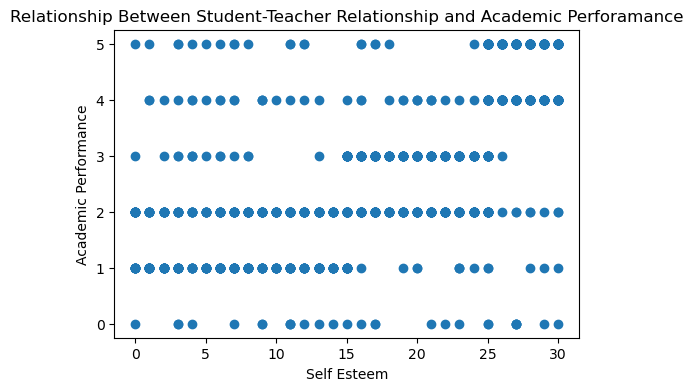

<Axes: xlabel='self_esteem', ylabel='Count'>

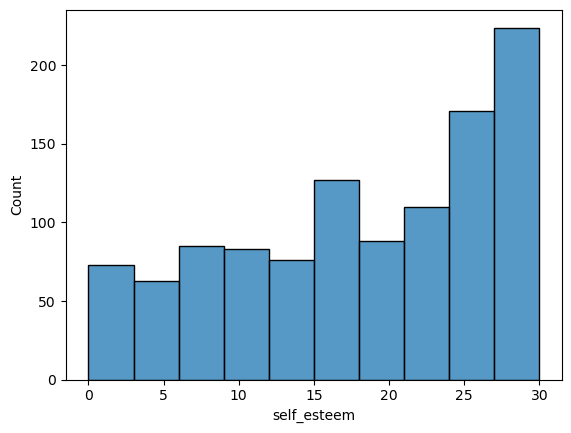

In [382]:
#Self-Esteem Effect on Academic Performance
plt.figure(figsize = (6,4))
plt.scatter(x = 'self_esteem', y = 'academic_performance', data = df)
plt.xlabel('Self Esteem')
plt.ylabel('Academic Performance')
plt.title('Relationship Between Student-Teacher Relationship and Academic Perforamance')
plt.show()


sns.histplot(df.self_esteem, bins = 10)


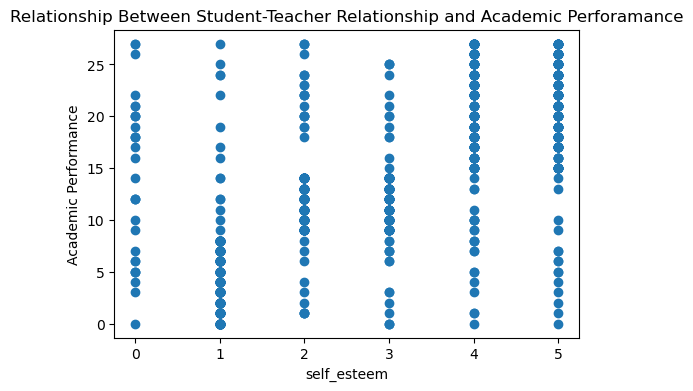

<Axes: xlabel='future_career_concerns', ylabel='Count'>

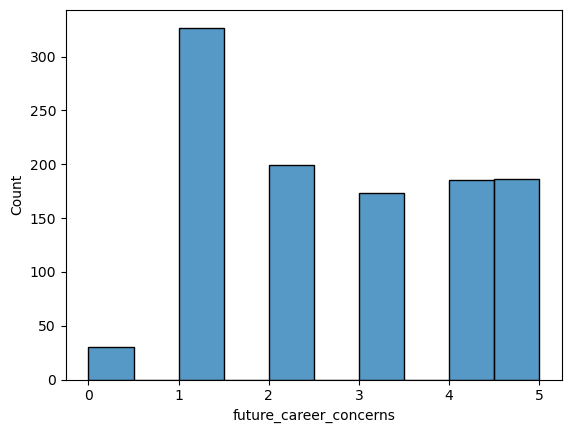

In [383]:
#Future Career Concerns Effect on Depression
plt.figure(figsize = (6,4))
plt.scatter(x = 'future_career_concerns', y = 'depression', data = df)
plt.xlabel('self_esteem')
plt.ylabel('Academic Performance')
plt.title('Relationship Between Student-Teacher Relationship and Academic Perforamance')
plt.show()

sns.histplot(df.future_career_concerns, bins = 10)


C:\Users\iamis\AppData\Local\Temp\ipykernel_29548\156859750.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['depression'], bins = 6)
C:\Users\iamis\AppData\Local\Temp\ipykernel_29548\156859750.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['anxiety_level'], bins = 6)


<Axes: xlabel='anxiety_level', ylabel='Density'>

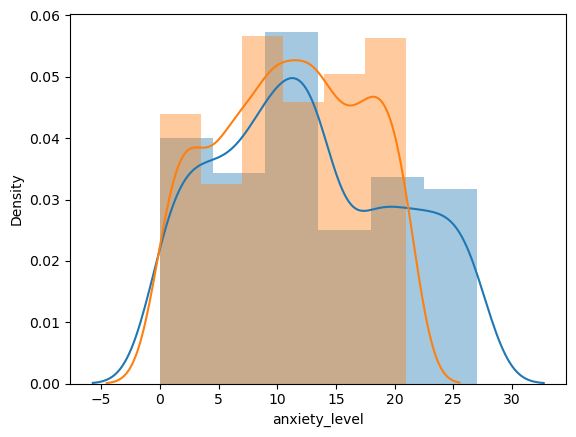

In [385]:
#Depression and Anxiety Level Plotting
sns.distplot(df['depression'], bins = 6)
sns.distplot(df['anxiety_level'], bins = 6)

C:\Users\iamis\AppData\Local\Temp\ipykernel_29548\4113264116.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['academic_performance'], bins = 6)
C:\Users\iamis\AppData\Local\Temp\ipykernel_29548\4113264116.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['teacher_student_relationship

<Axes: xlabel='teacher_student_relationship', ylabel='Density'>

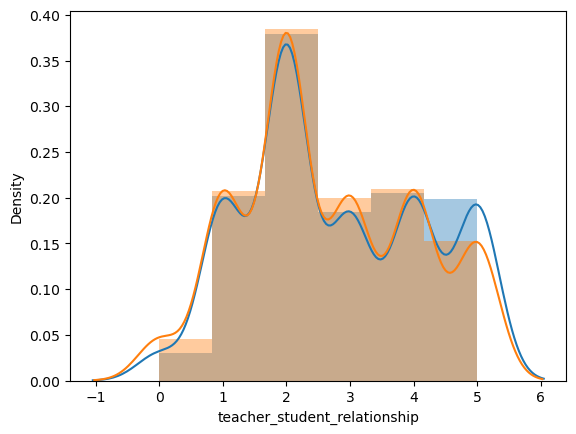

In [386]:
#Academic Performance and Teacher-Student Relationship Plotting
sns.distplot(df['academic_performance'], bins = 6)
sns.distplot(df['teacher_student_relationship'], bins = 6)

In [ ]:
Summary: Based on the EDA, we have reason to believe that the dataset is adequate enough to broach our our principal research question wich is "What are the key determinants of student stress levels and what interventions can we propose to school administrators to mitigate the stressors?""
The confusion matrix shown above demonstrate that there are several positive and negative correlations between variables. More specifically, the our outcome variable of interst was stress level. From this we compared
the strength of other variables to this target variables
For example, we found that between the five features (stress level factors) that we used to categorize the data (physchological, physiological, environmental, social, and academic), these were some of the
the most prominent positive and negative correlations:
Notable Positive Correlations
Social → Bullying 0.75
    Academic → Career Concerns 0.74
    Psychological → Anxiety 0.74
    Notable Negative Correlations
    Psychological → Self Esteem -0.76
    Physiological → Sleep Quality -0.75
    Environmental → Basic Needs -0.71
The scatter plots above are supposed to demonstrate the correlation between variables of interest that include academic performance, anxiety, teacher-student relationship, and stress levels.
The density graphs highlighs the spread between two category variables. For example, the denisty graph on student-teacher relationship and academic performance demonstrates that these two features are highly dependent on each other and show a positve/negative correlation.
In this case, the realtionship between academic performance and student-teacher relationship is strong as the two graphs share similar density ratios. 

# Principal Component Analysis (PCA)

In [327]:
#Initial Data Sorting, Outlier Removal, & Scaling

#Outlier Removal via Z-Scores
z_scores=np.abs(stats.zscore(df))
outliers=(z_scores>2).any(axis=1)
    #A threshold of +/-2 generally removes extreme outliers
df_z=df[~outliers]
    #Defines the dataset without extreme outliers

robust_scaler = RobustScaler()
robust_df=pd.DataFrame(robust_scaler.fit_transform(df_z), columns=df.columns)

#Splitting data into x & y for target var.
x_r=robust_df.drop('stress_level', axis=1)
y_r=robust_df['stress_level']

Text(0.5, 1.0, 'Unscaled Student Stress Box Plot after Z-Score')

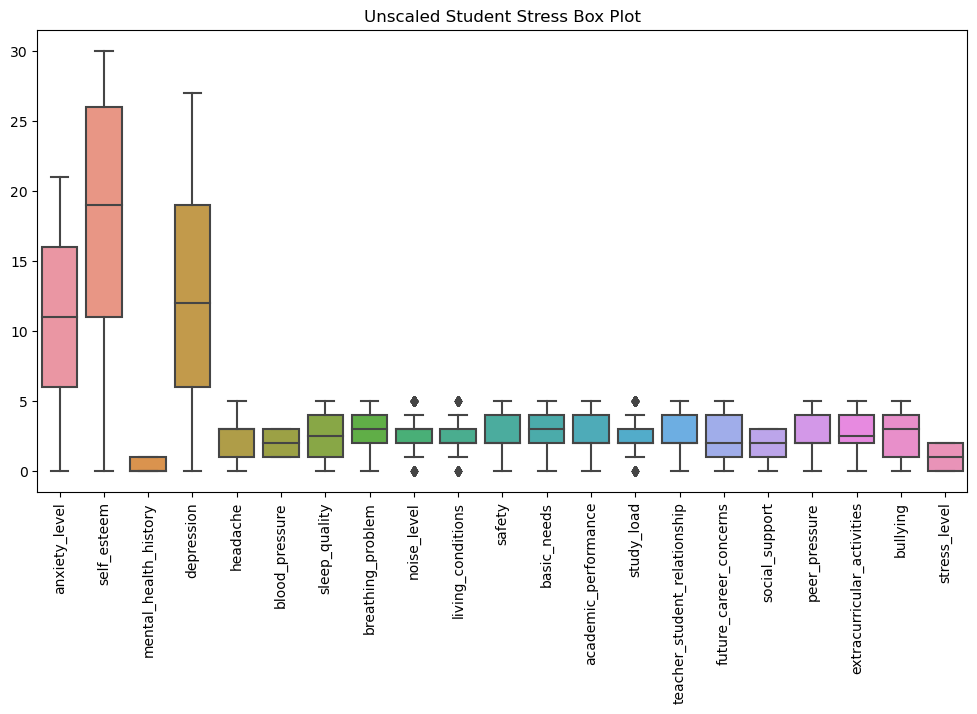

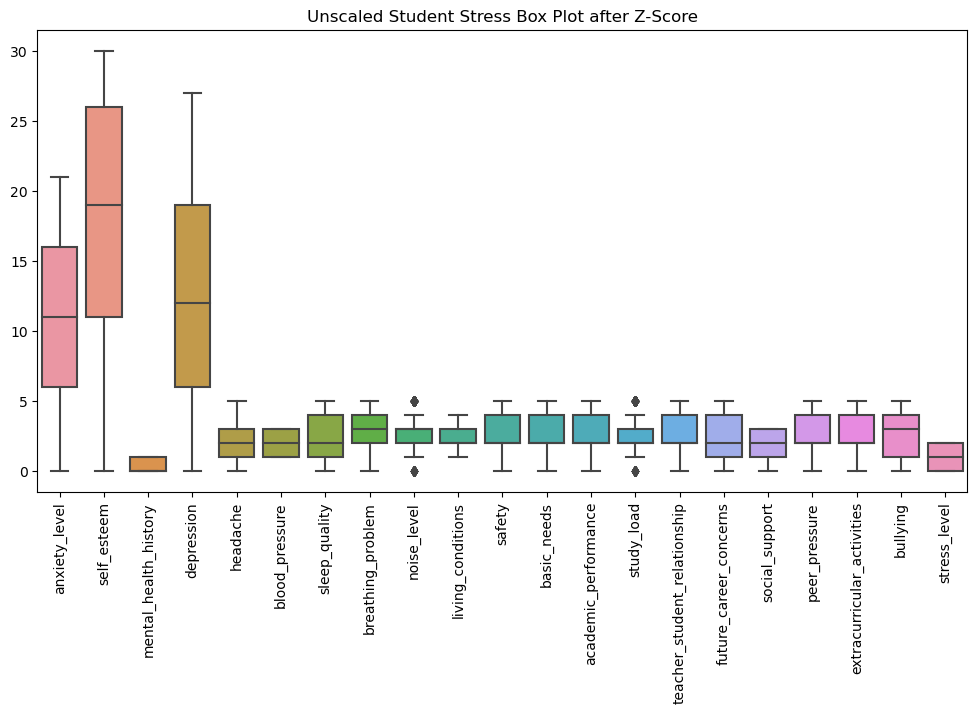

In [316]:
#Unscaled data box plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Unscaled Student Stress Box Plot')

#Unscaled data box plot, outlier removal
plt.figure(figsize=(12,6))
sns.boxplot(data=df_z)
plt.xticks(rotation=90)
plt.title('Unscaled Student Stress Box Plot after Z-Score')

&emsp;&emsp;The box plots show a removal of extreme outliers specifically for the living_conditions feature. Although not ideal as noise_level and study_load continued to have outliers, in order to avoid removing crucial data the Z-Score threshold was not lowered further. Usage of IQR (not shown) appeared too harsh, as it removed data to the point of creating new outliers.

In [317]:
#Checking data preparedness for PCA
display(robust_df.describe())
print('Data loss following outlier removal changed dataset shape from ',df.shape, 'to ',stnd_df.shape,'.')

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,...,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,0.008767,-0.077071,0.496146,0.039944,0.236031,0.066474,0.215157,-0.100674,-0.348748,0.509634,...,0.392100,0.389210,0.634875,0.347784,0.217405,-0.017823,0.371869,0.383911,-0.120424,-0.001927
std,0.611392,0.595691,0.500226,0.593537,0.691366,0.416526,0.511261,0.685101,1.306372,0.976781,...,0.709432,0.699055,1.273806,0.687363,0.508310,0.506867,0.708101,0.696984,0.504509,0.410207
min,-1.100000,-1.266667,0.000000,-0.923077,-1.000000,-0.500000,-0.666667,-1.500000,-3.000000,-1.000000,...,-1.000000,-1.000000,-2.000000,-1.000000,-0.666667,-1.000000,-1.000000,-1.000000,-1.000000,-0.500000
25%,-0.500000,-0.533333,0.000000,-0.461538,-0.500000,-0.500000,-0.333333,-0.500000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.333333,-0.500000,0.000000,0.000000,-0.666667,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.466667,1.000000,0.538462,0.500000,0.500000,0.666667,0.500000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.666667,0.500000,1.000000,1.000000,0.333333,0.500000
max,1.000000,0.733333,1.000000,1.153846,1.500000,0.500000,1.000000,1.000000,2.000000,2.000000,...,1.500000,1.500000,3.000000,1.500000,1.000000,0.500000,1.500000,1.500000,0.666667,0.500000


Data loss following outlier removal changed dataset shape from  (1100, 21) to  (793, 21) .


&emsp;&emsp;The cleaned dataset for PCA processing initially (not shown) didn't demonstrate near-0 means using the StandardScaler. Following a switch to RobustScaler to account for skewed data, as seems to be true according to our EDA, data means are signficiantly closer to near-0 and can be more reliably interpreted.

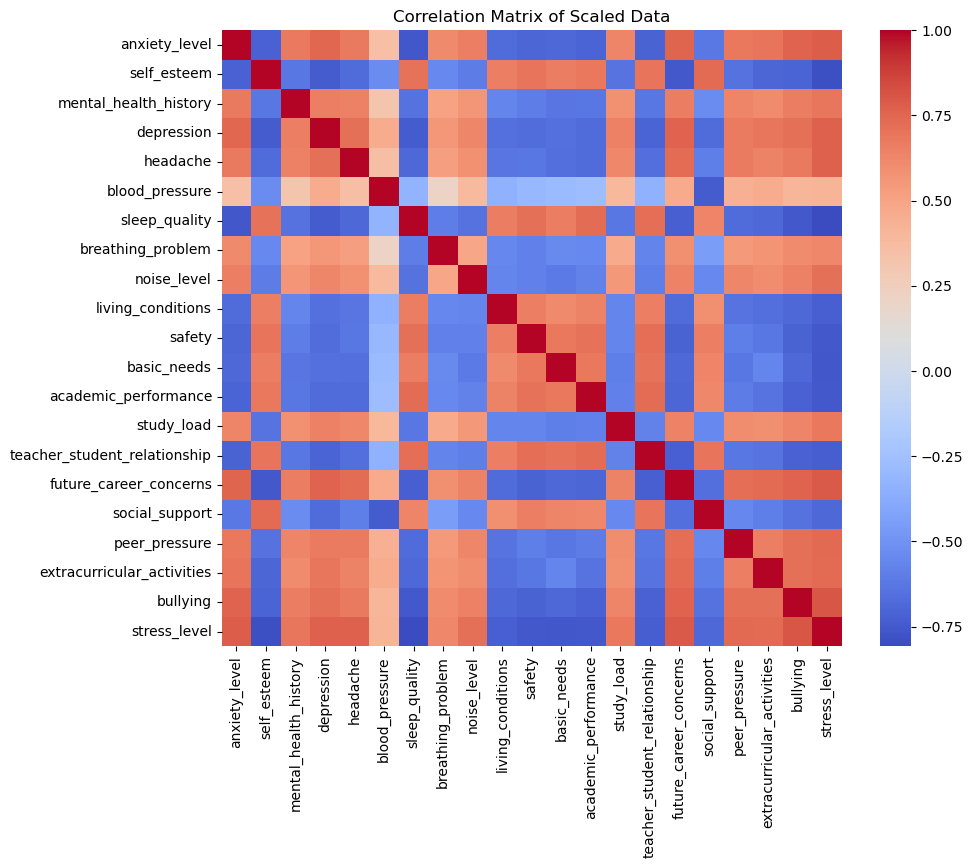

In [318]:
#Checking for collinearity among features
corr=robust_df.corr()

#Plotting correlation with heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Matrix of Scaled Data')
plt.show()

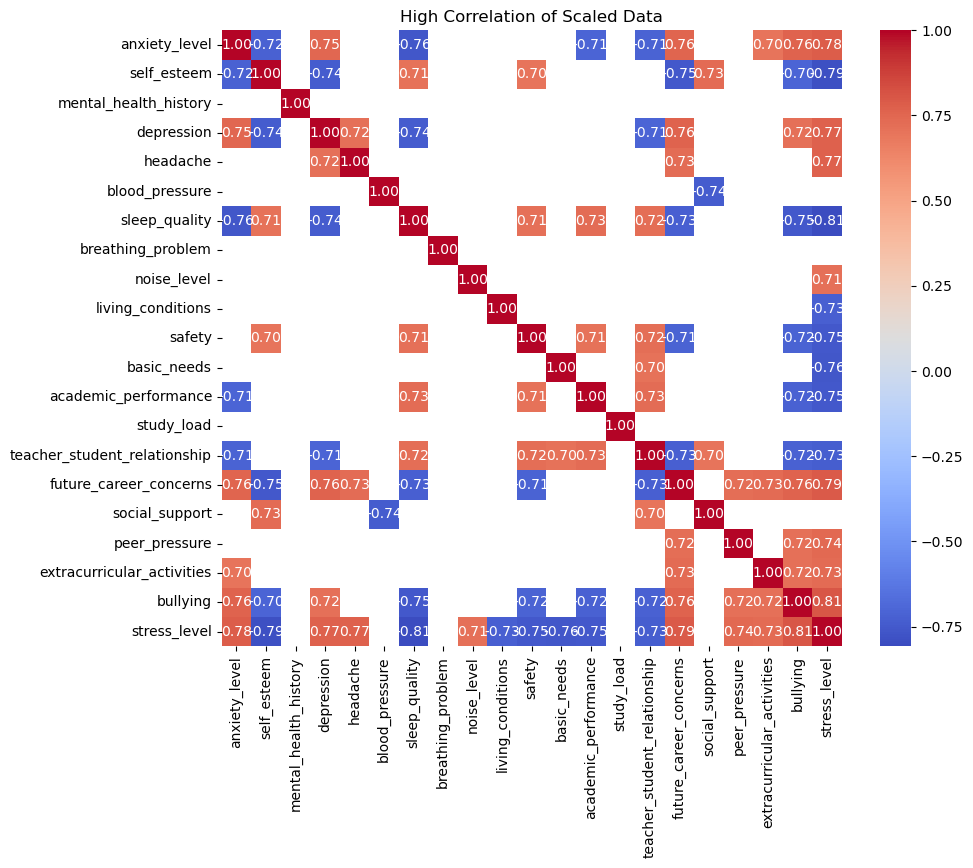

In [319]:
#Limiting Correlation Matrix to Highly Correlated Variables
threshold=0.7                         #Setting a 0.7 filter to identify high correlation
high_corr=corr[abs(corr)>threshold]   #abs allows correlation in either dir.

#Plotting High Correlation
plt.figure(figsize=(10,8))
sns.heatmap(high_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('High Correlation of Scaled Data')
plt.show()

&emsp;&emsp;The resulting matrix is slightly horrifying to view, but easier to understand. Among the 21 features under investigation, variables such as stress and anxiety levels, sleep quality and anxiety level, bullying and stress level, self-esteem and future career concerns, etc. are highly correlated. Using a 0.7 threshold, the spaces marked show the top of these relationships, with those marked blue having negative correlation and those in orange-red having positive correlation. For example, as sleep quality increases, stress levels decrease. Meanwhile, those with greater future career concerns appear to demonstrate direct correlation with increased bullying and depression.

&emsp;&emsp;Whether or not to remove highly correlated variables from the PCA comes down to a judgment call based upon the data itself. Although PCA uses collinearity to reduce redundancy, variable contribution to the same principal component may lead to an overemphasis of feature signifance. Put in other words, highly "correlated features increase the contribution of their underlying common factor to the PCA" (@ttnphns on StackExchange). This was the reasoning for providing a correlation matrix: by identifying near-identical features, we might reduce redundant feature dominance. However, according to our matrix a high number of variables are within the abs(0.7-0.81) range, and their loss would prove extreme. This ultimately is a judgement call, but removal of these features seems to be significant enough that important relationships in the dataset would be lost. Additionally, scaling appeared to bring the data to an acceptable mean range: it was decided to continue with the PCA without manual feature removal.

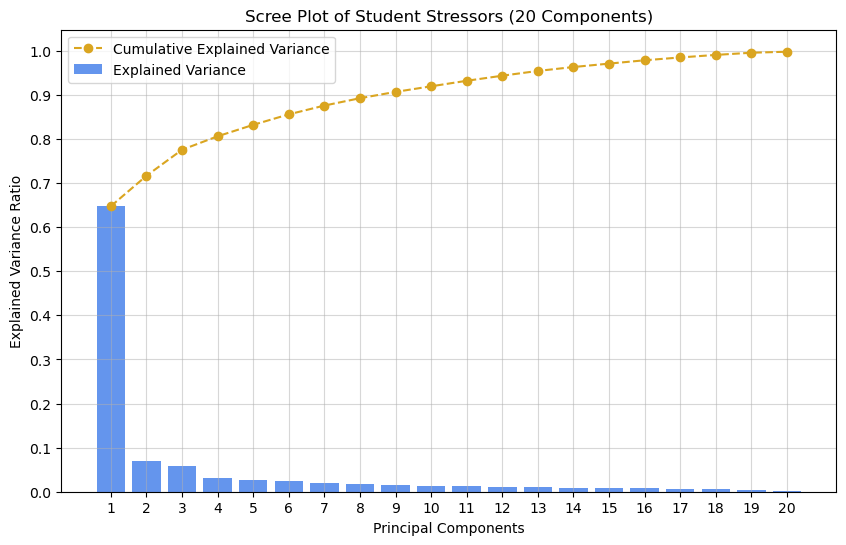

In [320]:
#Scree Plot on Stnd. Scaled Data
pca = decomposition.PCA(n_components=20)
pca.fit(robust_df)

# Explained variance and cumulative explained variance
exp_var = pca.explained_variance_ratio_
cumul_var = np.cumsum(exp_var)

# Visualizing the Scree Plot for 20 components
plt.figure(figsize=(10, 6))
plt.bar(range(1, 21), exp_var, label='Explained Variance', color='cornflowerblue')
    #Creates a bar plot of explained variance (+ having fun with the color options)
plt.plot(range(1, 21), cumul_var, marker='o', linestyle='--',
         color='goldenrod', label='Cumulative Explained Variance')
    #Overlays a lineplot of the cumulative variance 
    #(as additionally seen) in the plot below
plt.xticks(range(1, 21))
    #Defining the range by component for easy visual check
plt.yticks(np.linspace(0, 1, 11))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot of Student Stressors (20 Components)')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [321]:
#Exact Explained & Cumulative Values
#Looping through first 5 components exact values for specific variance understanding
for i in range(5):
    print(f"Component {i + 1}: Explained Variance: {exp_var[i]}, Cumulative Variance: {cumul_var[i]}")

Component 1: Explained Variance: 0.6475870015631642, Cumulative Variance: 0.6475870015631642
Component 2: Explained Variance: 0.06898181231152592, Cumulative Variance: 0.7165688138746901
Component 3: Explained Variance: 0.05905544845587011, Cumulative Variance: 0.7756242623305601
Component 4: Explained Variance: 0.030527934385361756, Cumulative Variance: 0.8061521967159219
Component 5: Explained Variance: 0.025939204108578424, Cumulative Variance: 0.8320914008245003


An explained variance of  0.7756242623305601  requires a component number of 3.


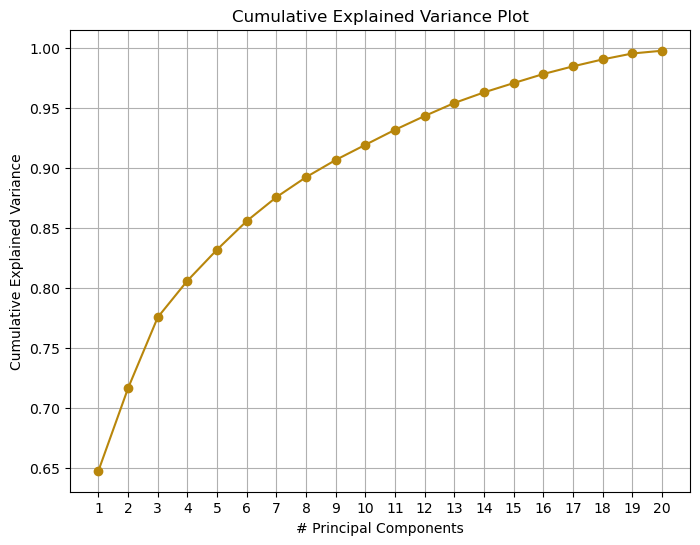

In [323]:
#Close-Up of Cumulative Explained Variance
plt.figure(figsize=(8,6))
plt.plot(range(1,21), cumul_var, marker='o', color='darkgoldenrod')
plt.xticks(range(1,21))
plt.xlabel('# Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()

print('An explained variance of ', cumul_var[2],
      ' requires a component number of 3.')

&emsp;&emsp;An elbow plot method for finding the appropriate component number was initially taken, however this appeared to visually provide clear results only when used with unscaled data (see scrapped plot below). Despite providing a clear turning point as described in the elbow method, this information was ultimately discarded as the lack of scaling allowed disproportionate variable influence on the PCA. 

&emsp;&emsp;Instead, scaled checks were performed, as shown above. Explained variance describes the model's capability to account for dataset variance at individual predictor quantities. In the scree plot demonstrating eigenvalue size as its y-axis, the magnitude for each component represents explained variance per principal component. Above it, and in the plot directly below, the cumulative explained variance demonstrates summed variance, allowing for a more direct understanding of the number of components required for a better representation of dataset variation. For instance, one principal component would only explain about 0.65 variance, but in order to reach about 0.78 (as decided to reduce complexity while maintaining accuracy), PCA must be conducted with 3 components.

Due to disproportionate variable effect, the elbow point appears to be at explained variance: 0.9301321006209999 with component number  3 .


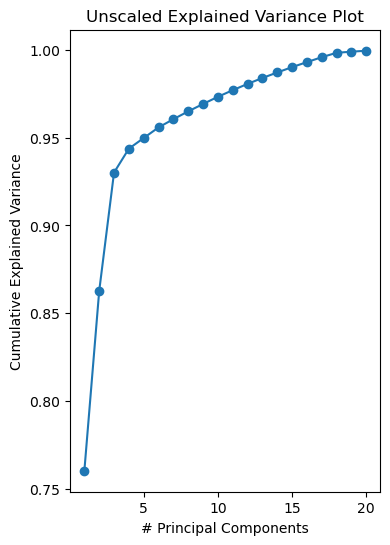

In [324]:
#Displaying initial misconceptions on the Elbow Method w/ UNSCALED data

comp_range=np.arange(1,21)  #Range of component values for testing
variances=[]                #Empty series for variance values in loop
cumul_var=[]                #Empty series for cumulative variance

#Filling variances series with values for each component tested
for i in comp_range:
    pca=decomposition.PCA(n_components=i)
        #Requests 'i' components during PCA transform
    pca.fit(df)
    variances.append(np.sum(pca.explained_variance_ratio_))
    
    
#Visualize Variance vs. Number of Principal Components
plt.figure(figsize=(4,6))
plt.plot(comp_range, variances, marker='o')
plt.xlabel('# Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Unscaled Explained Variance Plot')

print('Due to disproportionate variable effect, the elbow point'
      ,'appears to be at explained variance:', variances[2],
     'with component number ', comp_range[2],'.')

&emsp;&emsp;Lineplot above included to show initial misgivings and the danger of unscaled data. Due to differences in data collection (eg using a combination of binary, GAD-7, and RSE evaluations, etc.), set features mistakenly appeared to have more significant effect. This allowed the initial belief that 3 principal components were capable of describing more than 0.9 of the data's variance. In fact, this was due to skew.

Text(0.5, 0.92, 'PCA on Student Stress Factors')

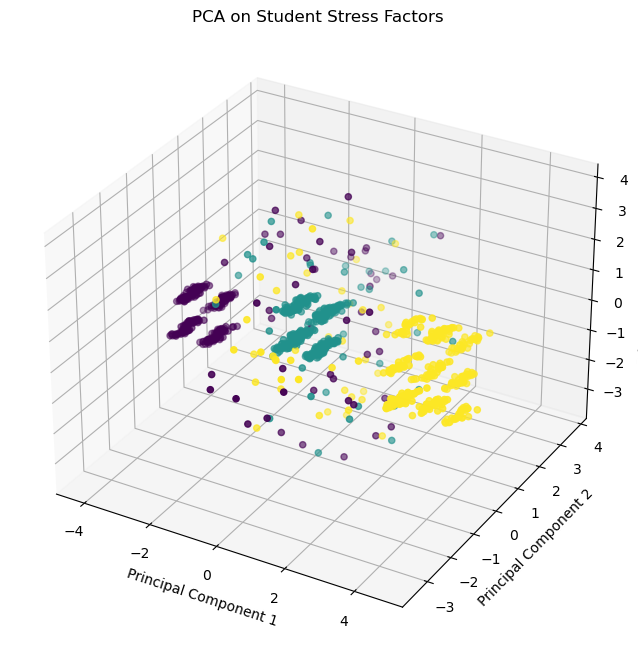

In [398]:
#3D View of PCA w/ 3 components
pca_3=decomposition.PCA(n_components=3)
x_3=pca_3.fit_transform(robust_df)

#Creating an empty 3D scatter plot to be filled
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111, projection='3d')

#Ploting 3 principal components
scatter=ax.scatter(x_3[:,0], x_3[:,1], x_3[:,2], c=y_r)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA on Student Stress Factors')

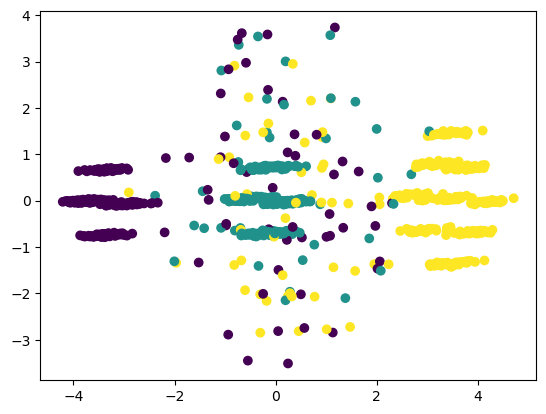

In [332]:
#2-D Version
plt.scatter(x_3[:,0],x_3[:,1],c=y_r)

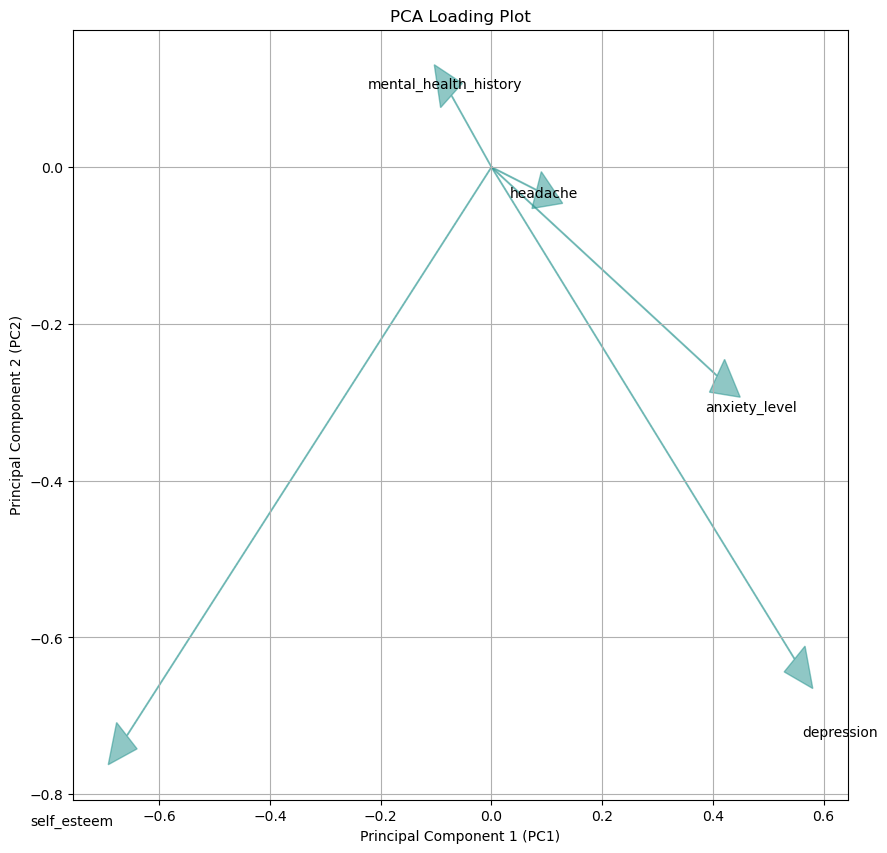

In [352]:
#Define and Visualize Loading Plot

#Defines function to visualize a loading plot
def loading_plot(coeff, labels, num_vars=5):
    n = min(coeff.shape[0], num_vars)
    plt.figure(figsize=(10, 10))
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], head_width=0.05, head_length=0.05, color='#21918C', alpha=0.5)
                #Creates 2-D arrow line vectors
        plt.text(coeff[i, 0]*1.15, coeff[i, 1]*1.15, labels[i], ha='center', va='center')
    
    plt.xlabel('Principal Component 1 (PC1)')
    plt.ylabel('Principal Component 2 (PC2)')
    plt.title('PCA Loading Plot')
    plt.grid()

loading_plot(pca.components_.T, df.columns)
    #Transposed pca components so that each row corresponds to a feature

&emsp;&emsp;The loading plot demonstrates feature influence on the eigenvalues involved in PCA analysis. In this case, dataset variance among PC1 and PC2 was most heavily explained by self esteem and depression evaluations. Diversity in the severity of these two factors may be the greatest contributors to potentential student sub-group differentiation.

# t-SNE Visualization

C:\Users\iamis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\iamis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



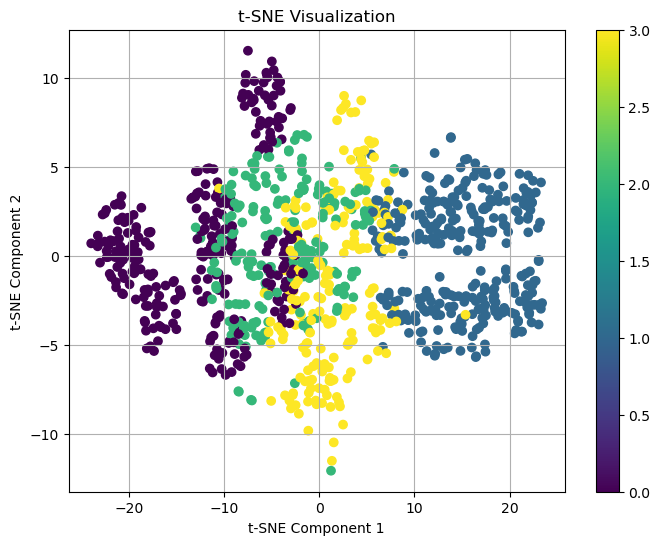

In [414]:
#2D t-SNE Plot
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=4, random_state=42)
labels=kmeans.fit_predict(robust_df)

tsne = TSNE(n_components=3, random_state=42)
pca_tsne_3 = tsne.fit_transform(robust_df)

# Plot t-SNE visualization
#(t-Distributed Stochastic Neighbor Embedding)
plt.figure(figsize=(8, 6))
plt.scatter(pca_tsne_3[:, 0], pca_tsne_3[:, 1], c=labels)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.grid()
plt.show()

In [415]:
#3-D Interactive t-SNE Plot
import plotly.express as px

data_3d = pd.DataFrame({
    'Dimension 1': pca_tsne_3[:, 0],
    'Dimension 2': pca_tsne_3[:, 1],
    'Dimension 3': pca_tsne_3[:, 2],
    'Cluster': labels})

# Interactive 3D scatter plot
fig = px.scatter_3d(data_3d, x='Dimension 1', y='Dimension 2', z='Dimension 3', color='Cluster')
fig.update_layout(scene=dict(
                    xaxis=dict(title='Dimension 1'),
                    yaxis=dict(title='Dimension 2'),
                    zaxis=dict(title='Dimension 3')),
                  width=800, height=600)
fig.update_traces(marker={'size':4})
fig.show()

## Logistic Regression Model Analysis : 

Objective : To accurately predict stress levels (low:0, moderate:1, high:2) with different factors:


            1. utilising all the 20 factors , which would make a complex model
            2. utilising only 7 factors derived from the PCA analysis
            3. utilising factors that the school adminstration can collect without surveying the student.

Potential Drawback : 
Choosing the right set of variables is crucial in logistic regression. Irrelevant or redundant predictors can reduce model performance. Moreover, if important predictors are omitted, the model might fail to capture essential aspects that influence stress levels.

unique stress levels in the dataset: [1 2 0]


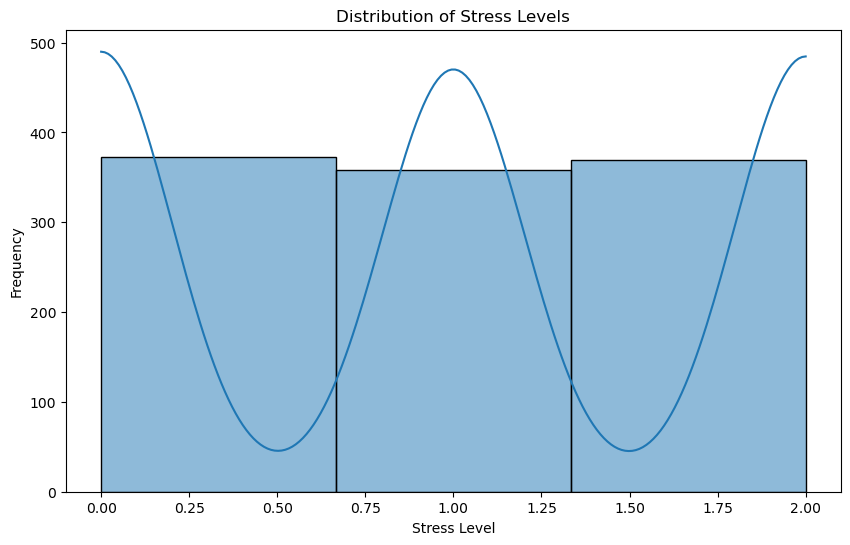

Total number of students: 1100
students with stress level 0 = 373
students with stress level 1 = 358
students with stress level 2 = 369


In [353]:
#EDA to analyse the outcome variable: 
stress_list = df['stress_level'].unique()
 
#show the list
print("unique stress levels in the dataset:",stress_list)


#histogram for stress levels
plt.figure(figsize=(10, 6))
sns.histplot(df['stress_level'], kde=True, bins=len(df['stress_level'].unique()))
plt.title('Distribution of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()


#number of students experiencing stress levels 0 ,1 ,2 :
count_1=0
count_0=0
count_2=0
for i in range(0,len(df['stress_level'])):
    if df['stress_level'][i]==1:
        count_1+=1
    elif df['stress_level'][i]==0:
        count_0+=1
    else:
        count_2+=1
print("Total number of students: 1100")
print("students with stress level 0 =", count_0)
print("students with stress level 1 =", count_1)
print("students with stress level 2 =", count_2)

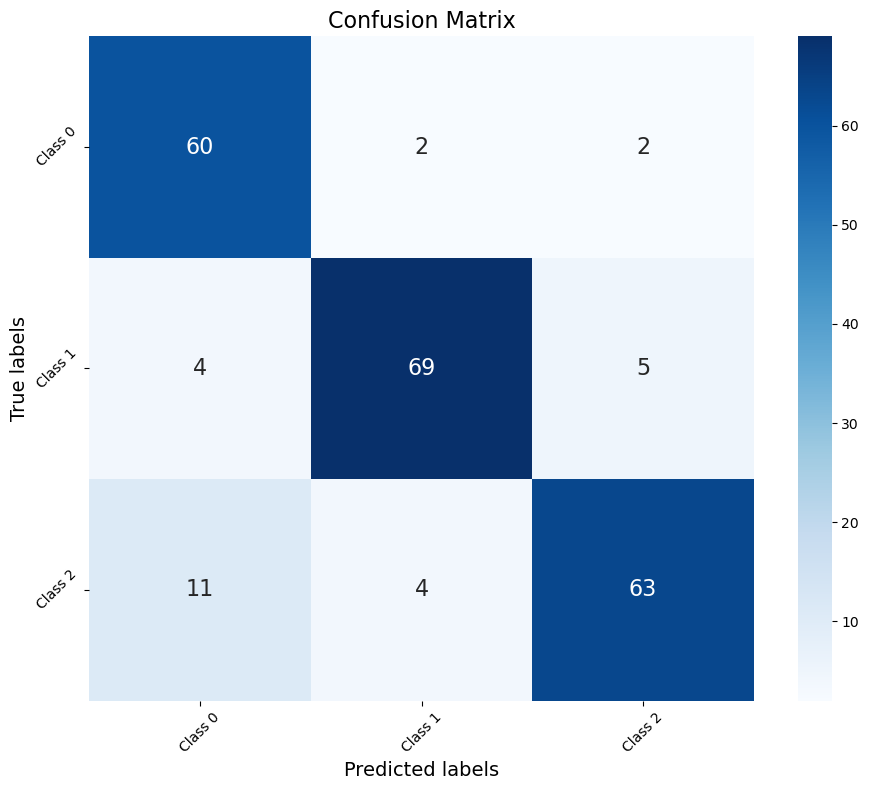

              precision    recall  f1-score   support

           0       0.80      0.94      0.86        64
           1       0.92      0.88      0.90        78
           2       0.90      0.81      0.85        78

    accuracy                           0.87       220
   macro avg       0.87      0.88      0.87       220
weighted avg       0.88      0.87      0.87       220



In [399]:
#Logistic Regression model to predict stress level utilising all 20 factors
feature_cols = ['anxiety_level',
 'self_esteem',
 'mental_health_history',
 'depression',
 'headache',
 'blood_pressure',
 'sleep_quality',
 'breathing_problem',
 'noise_level',
 'living_conditions',
 'safety',
 'basic_needs',
 'academic_performance',
 'study_load',
 'teacher_student_relationship',
 'future_career_concerns',
 'social_support',
 'peer_pressure',
 'extracurricular_activities',
 'bullying']

X = df[feature_cols] # Features

y = df.stress_level # Target variable


#run a losgitic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(random_state=16, max_iter=1000)

logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)
#Visualizing the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g', square=True, annot_kws={"size": 16})

# Set the labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=14)
ax.set_ylabel('True labels', fontsize=14)
ax.set_title('Confusion Matrix', fontsize=16)

# Define the labels based on the classification report
class_labels = ['Class 0', 'Class 1', 'Class 2']
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Rotate the tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Adjust layout for a nicer look
plt.tight_layout()

# Show the plot
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

In [400]:
#Describes the weight per each principal component of the PCA above

components=pca_3.components_
feature_names = list(df.columns)

#Loops to display the weighted features for each principal component
for i, component in enumerate(components):
    print(f"Principal Component {i + 1}:")
        #Pairs each feature with corresponding weight
    features_with_weights = list(zip(feature_names, component))
        #Orders features by their weights
    features_with_weights.sort(key=lambda x: abs(x[1]), reverse=True)
    for feature, weight in features_with_weights:
        print(f"{feature}: {weight:.4f}")
    print()

Principal Component 1:
noise_level: 0.3990
study_load: 0.3848
living_conditions: -0.2961
basic_needs: -0.2153
peer_pressure: 0.2148
academic_performance: -0.2134
teacher_student_relationship: -0.2129
extracurricular_activities: 0.2116
headache: 0.2112
safety: -0.2109
anxiety_level: 0.1973
depression: 0.1889
self_esteem: -0.1879
breathing_problem: 0.1757
future_career_concerns: 0.1653
sleep_quality: -0.1633
bullying: 0.1631
social_support: -0.1440
mental_health_history: 0.1429
stress_level: 0.1405
blood_pressure: 0.0752

Principal Component 2:
noise_level: -0.7365
study_load: 0.6699
headache: 0.0507
self_esteem: -0.0423
living_conditions: -0.0332
depression: 0.0309
academic_performance: -0.0257
mental_health_history: 0.0219
peer_pressure: -0.0186
future_career_concerns: 0.0137
blood_pressure: 0.0120
breathing_problem: -0.0108
social_support: -0.0106
safety: 0.0095
anxiety_level: -0.0090
basic_needs: 0.0090
stress_level: -0.0069
extracurricular_activities: 0.0050
sleep_quality: 0.0020
te

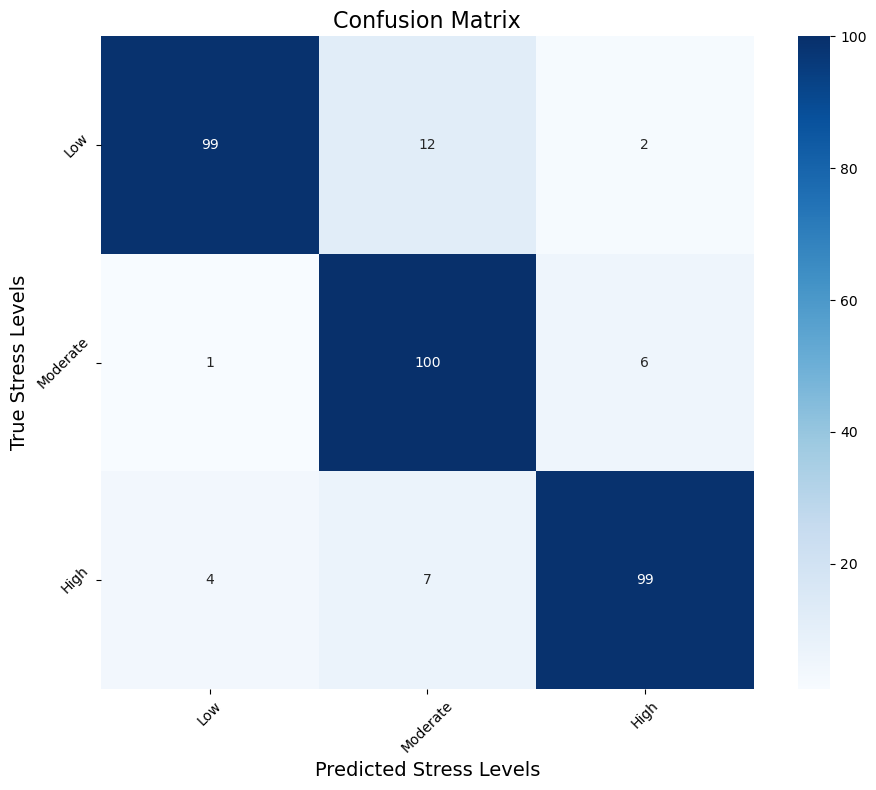

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       113
           1       0.84      0.93      0.88       107
           2       0.93      0.90      0.91       110

    accuracy                           0.90       330
   macro avg       0.91      0.90      0.90       330
weighted avg       0.91      0.90      0.90       330



In [402]:
#Logistic Regression model utilising only 3 features based on PCA analysis :
from sklearn.model_selection import cross_val_predict
feature_cols = ['Principal Component 1','Principal Component 2','Principal Component 3']

x = robust_df
y = df['stress_level'] # Target variable


#run a losgitic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

log_pca=decomposition.PCA(random_state=42, n_components=3)

pca.fit(X_train)
df_train_pca=log_pca.fit_transform(X_train)
df_test_pca=log_pca.transform(X_test)

logreg = LogisticRegression(random_state=42, max_iter=1000)

logreg.fit(df_train_pca, y_train)

y_pred = logreg.predict(df_test_pca)


#Initialize the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
#Visualizing the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g', square=True)

# Set the labels, title and ticks
ax.set_xlabel('Predicted Stress Levels', fontsize=14)
ax.set_ylabel('True Stress Levels', fontsize=14)
ax.set_title('Confusion Matrix', fontsize=16)

# Define the labels based on the classification report
class_labels = ['Low', 'Moderate', 'High']
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Rotate the tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Adjust layout for a nicer look
plt.tight_layout()

# Show the plot
plt.show()
# Print classification report
print(classification_report(y_test, y_pred))

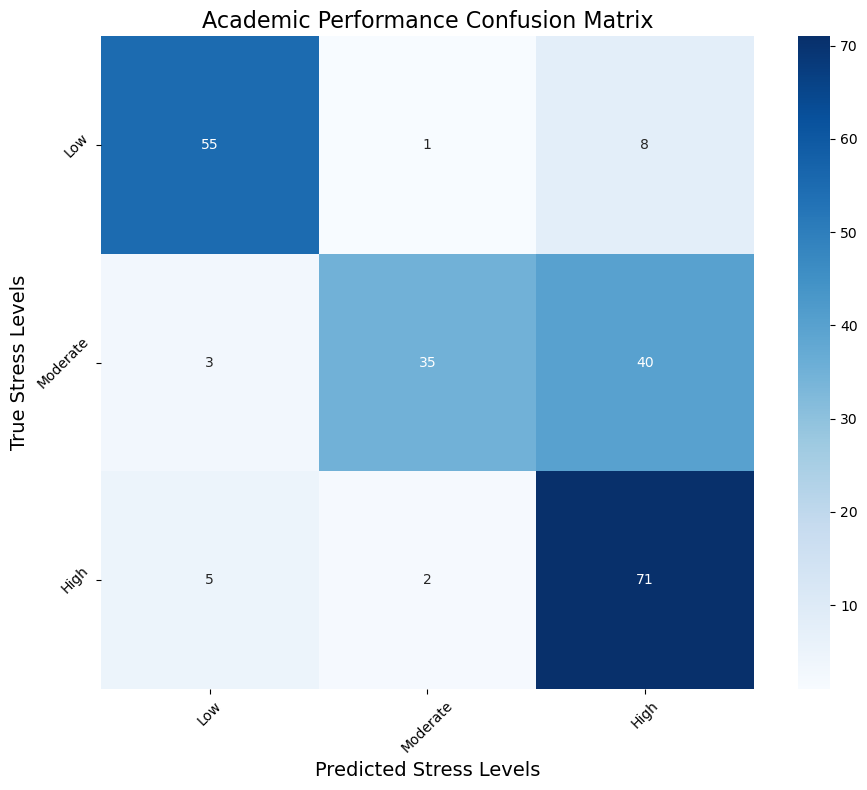

              precision    recall  f1-score   support

           0       0.87      0.86      0.87        64
           1       0.92      0.45      0.60        78
           2       0.60      0.91      0.72        78

    accuracy                           0.73       220
   macro avg       0.80      0.74      0.73       220
weighted avg       0.79      0.73      0.72       220



In [404]:
#Logistic regression model with the features that the school will have easy access to 


feature_cols = ['academic_performance']

X = df[feature_cols] # Features

y = df.stress_level # Target variable


#run a losgitic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(random_state=16, max_iter=1000)

logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)


#import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix



#Visualizing the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g', square=True)

# Set the labels, title and ticks
ax.set_xlabel('Predicted Stress Levels', fontsize=14)
ax.set_ylabel('True Stress Levels', fontsize=14)
ax.set_title('Academic Performance Confusion Matrix', fontsize=16)

# Define the labels based on the classification report
class_labels = ['Low', 'Moderate', 'High']  # Replace with your actual class names if available
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Rotate the tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Adjust layout for a nicer look
plt.tight_layout()

# Show the plot
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))


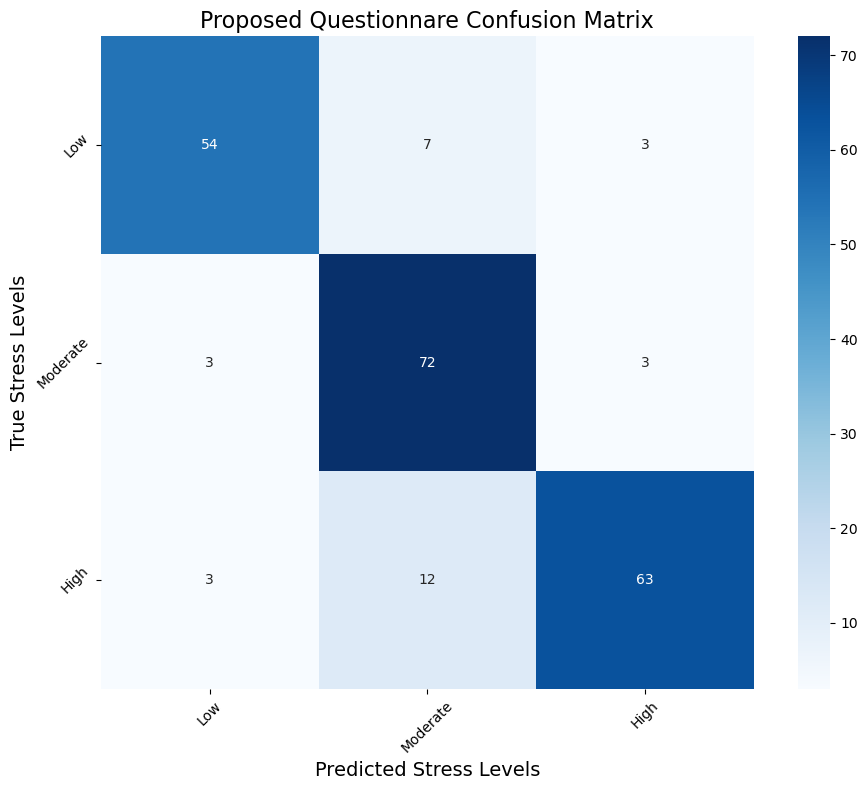

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        64
           1       0.79      0.92      0.85        78
           2       0.91      0.81      0.86        78

    accuracy                           0.86       220
   macro avg       0.87      0.86      0.86       220
weighted avg       0.87      0.86      0.86       220



In [425]:
#Logistic regression model with the selected features for questionnare 


feature_cols = ['anxiety_level', 'self_esteem', 'depression', 'academic_performance']

X = df[feature_cols] # Features

y = df.stress_level # Target variable


#run a losgitic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(random_state=16, max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)


#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

#Visualizing the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g', square=True)

# Set the labels, title and ticks
ax.set_xlabel('Predicted Stress Levels', fontsize=14)
ax.set_ylabel('True Stress Levels', fontsize=14)
ax.set_title('Proposed Questionnare Confusion Matrix', fontsize=16)

# Define the labels based on the classification report
class_labels = ['Low', 'Moderate', 'High']  # Replace with your actual class names if available
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Rotate the tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Adjust layout for a nicer look
plt.tight_layout()

# Show the plot
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

Result:
* Importance of Additional Factors: The increased performance in the 3-factor model highlights the value of including psychological and health-related factors (like anxiety, depression, and sleep quality) in stress prediction models.

* Trade-offs in Model Selection: Schools must consider trade-offs between model complexity (number of factors) and performance. While the 7-factor model is slightly more accurate, the school-known factors model is simpler and still provides robust predictions.

* Focus on Specific Stress Levels: Different models have strengths in predicting certain stress levels. Tailoring the model to the school's specific needs (e.g., focusing more on identifying high stress) could be a strategy.

* Practicality in Data Collection: The feasibility of collecting data on all 20 factors should be weighed against the marginal gains in prediction accuracy. If collecting data on additional factors is challenging, the school-known factors model offers a practical alternative.

## Kmeans clustering analysis : 
Objective :

    1.Identify appropriate number of clusters
    
    2.Visualise the clusters and cluster centroids 
    
    3.Identify patterns and groups within the student population based on stress factors.
    
Potential Drawback : K-means assumes that clusters are spherical and equally sized, which may not be the case in real-world data, leading to poor performance if the actual clusters have irregular shapes or vary in size


C:\Users\anushka\anacond\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


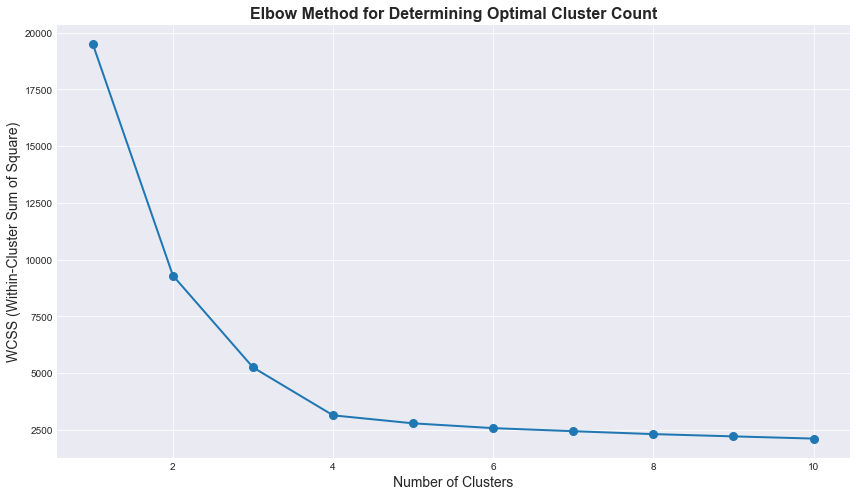

In [135]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# PCA for dimensionality reduction (optional)
pca = PCA(n_components=7)  # Adjust components based on your data
principal_components = pca.fit_transform(scaled_data)
# Choose the number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(principal_components)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 7))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', linewidth=2, markersize=8)
plt.title('Elbow Method for Determining Optimal Cluster Count', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS (Within-Cluster Sum of Square)', fontsize=14)
plt.tight_layout()
plt.show()


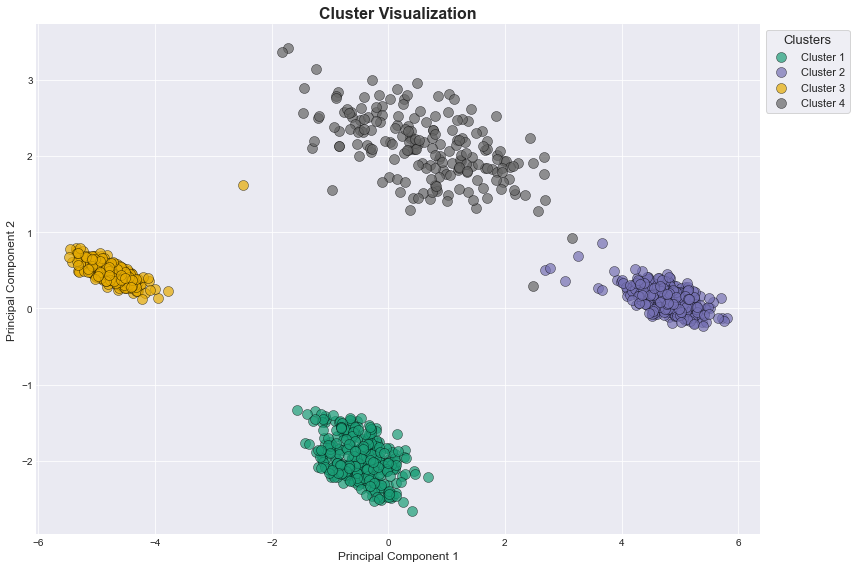

Silhouette Score: 0.6228400179399535


In [136]:
#Visualizing the K-means clusters

optimal_clusters = 4 
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(principal_components)

# This will give you the labels for each data point
cluster_labels = kmeans.labels_
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12, 8))
colormap = plt.cm.get_cmap("Dark2", optimal_clusters)
for i in range(optimal_clusters):
    plt.scatter(principal_components[cluster_labels == i, 0], 
                principal_components[cluster_labels == i, 1],
                color=colormap(i), 
                s=100, 
                alpha=0.7,
                edgecolor='black',  
                linewidth=0.5,
                label=f'Cluster {i+1}')


plt.title('Cluster Visualization', fontsize=16, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)

# Improve the legend by placing it outside of the plot
plt.legend(title='Clusters', title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 1), fontsize=11, frameon=True)

# Remove top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


# Calculate Silhouette Score
silhouette_avg = silhouette_score(principal_components, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

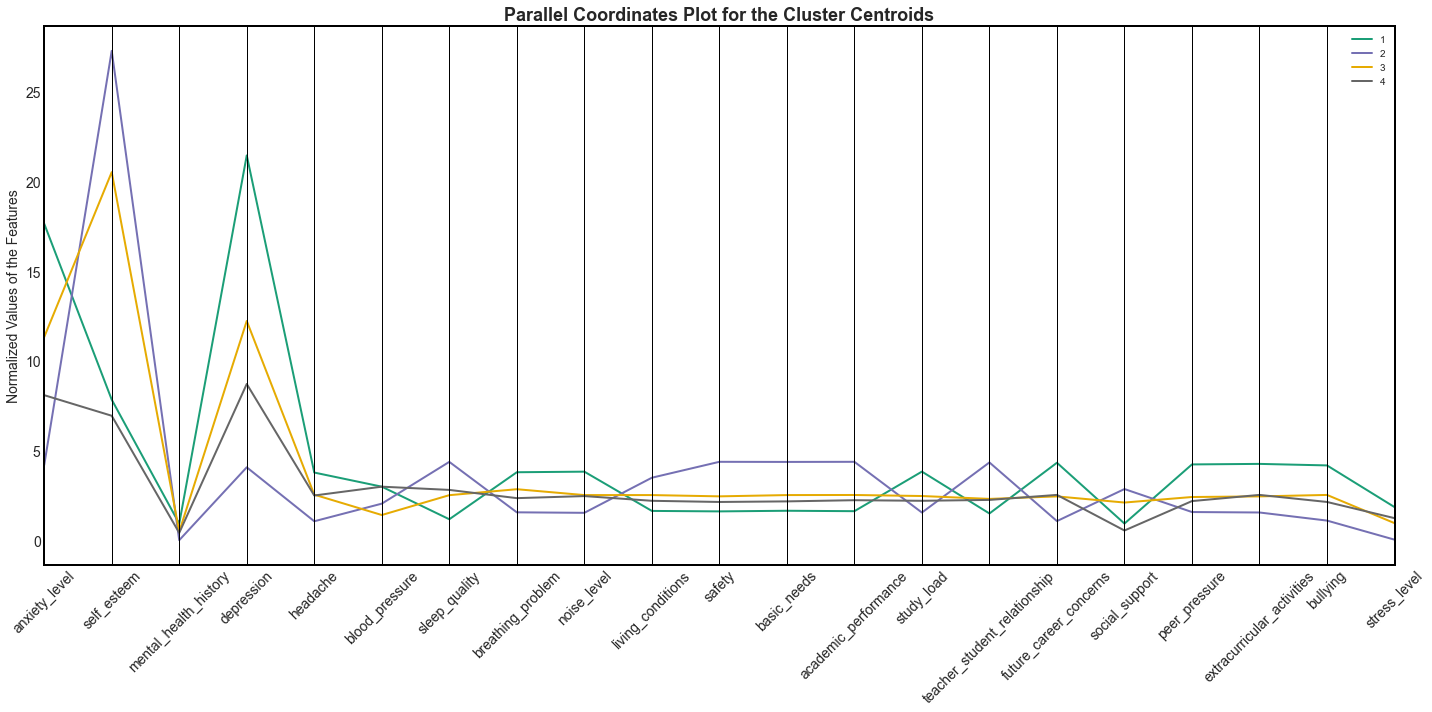

In [143]:
#Parallel coordinates plot to visualize the clusters from K means :  
#In the context of K-means clustering, a parallel coordinates plot can be used to visualize the centroids of the clusters.By visualizing these centroids, you can get a sense of how the clusters differ from each other across the various dimensions.

from pandas.plotting import parallel_coordinates
plt.figure(figsize=(20, 10))
ax = parallel_coordinates(centroids, class_column='Cluster', colormap=plt.get_cmap("Dark2"), linewidth=2)
plt.title('Parallel Coordinates Plot for the Cluster Centroids', fontsize=18, fontweight='bold')
ax.set_facecolor('white')


ax.set_ylabel('Normalized Values of the Features', fontsize=14)


plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(2)      
plt.tight_layout()
plt.show()


Result : 
* Through K means we were able to identify four distinct student groups/clusters.
It reveals that psychological factors, especially anxiety, depression, and self-esteem, are essential in differentiating the clusters because they are the dimensions along which the clusters have distinctly different average values, implying that these features are influential in the formation of the clusters

* Silhouette Score: 0.8471. The Silhouette Score ranges from -1 to 1. A score close to 1 implies that the data points are very well clustered, a score of 0 indicates overlapping clusters, and a score close to -1 suggests incorrect clustering.
In your case, a score of 0.8471 is quite high, indicating that the clusters are well-separated and each data point is, on average, closer to other points in its cluster than to points in other clusters. 



Characteristics of Each Cluster:

- Blue Cluster: Characterized by high self-esteem, low depression and anxiety, and better living conditions. This group might represent students who are managing stress effectively.

- Yellow Cluster: Identified with the lowest self-esteem, moderate levels of depression and anxiety, high blood pressure, and subpar living conditions. This group seems to be struggling more with stress.

- Purple Cluster: Marked by moderate to high self-esteem but prone to depression, coupled with moderate living conditions. This suggests a complex psychological profile.

- Green Cluster: Distinct with low self-esteem, high anxiety and depression levels, poor living conditions, and significant academic and social stressors. This is likely the group most at risk in terms of stress.

# Random Forest 

In [387]:
#Sort dataset into features & target variable
x=df.drop('stress_level', axis=1)
y=df['stress_level']

#Instantiating RandomForest & splitting train/test
rf = RandomForestClassifier(n_estimators=100, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)

In [388]:
#Using GridSearchSV

#Grid parameter options for GridSearchCV testing
param_grid = {'n_estimators': [10, 15, 20, 25, 30],
                'max_depth': [5, 8, 10, 15, 20],
                'min_samples_leaf': [2, 3, 5, 8, 10, 15]}

# Initialize random forest classifier
rand_forest = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rand_forest, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

#Returns built-in grid search cv cross-validated top scores
top_params = grid_search.best_params_
top_accuracy = grid_search.best_score_

print("Top Accuracy Score of ", top_accuracy, 'with the parameters ', top_params)

Top Accuracy Score of  0.8818181818181818 with the parameters  {'max_depth': 8, 'min_samples_leaf': 2, 'n_estimators': 10}


Random Forest Accuracy: 0.9


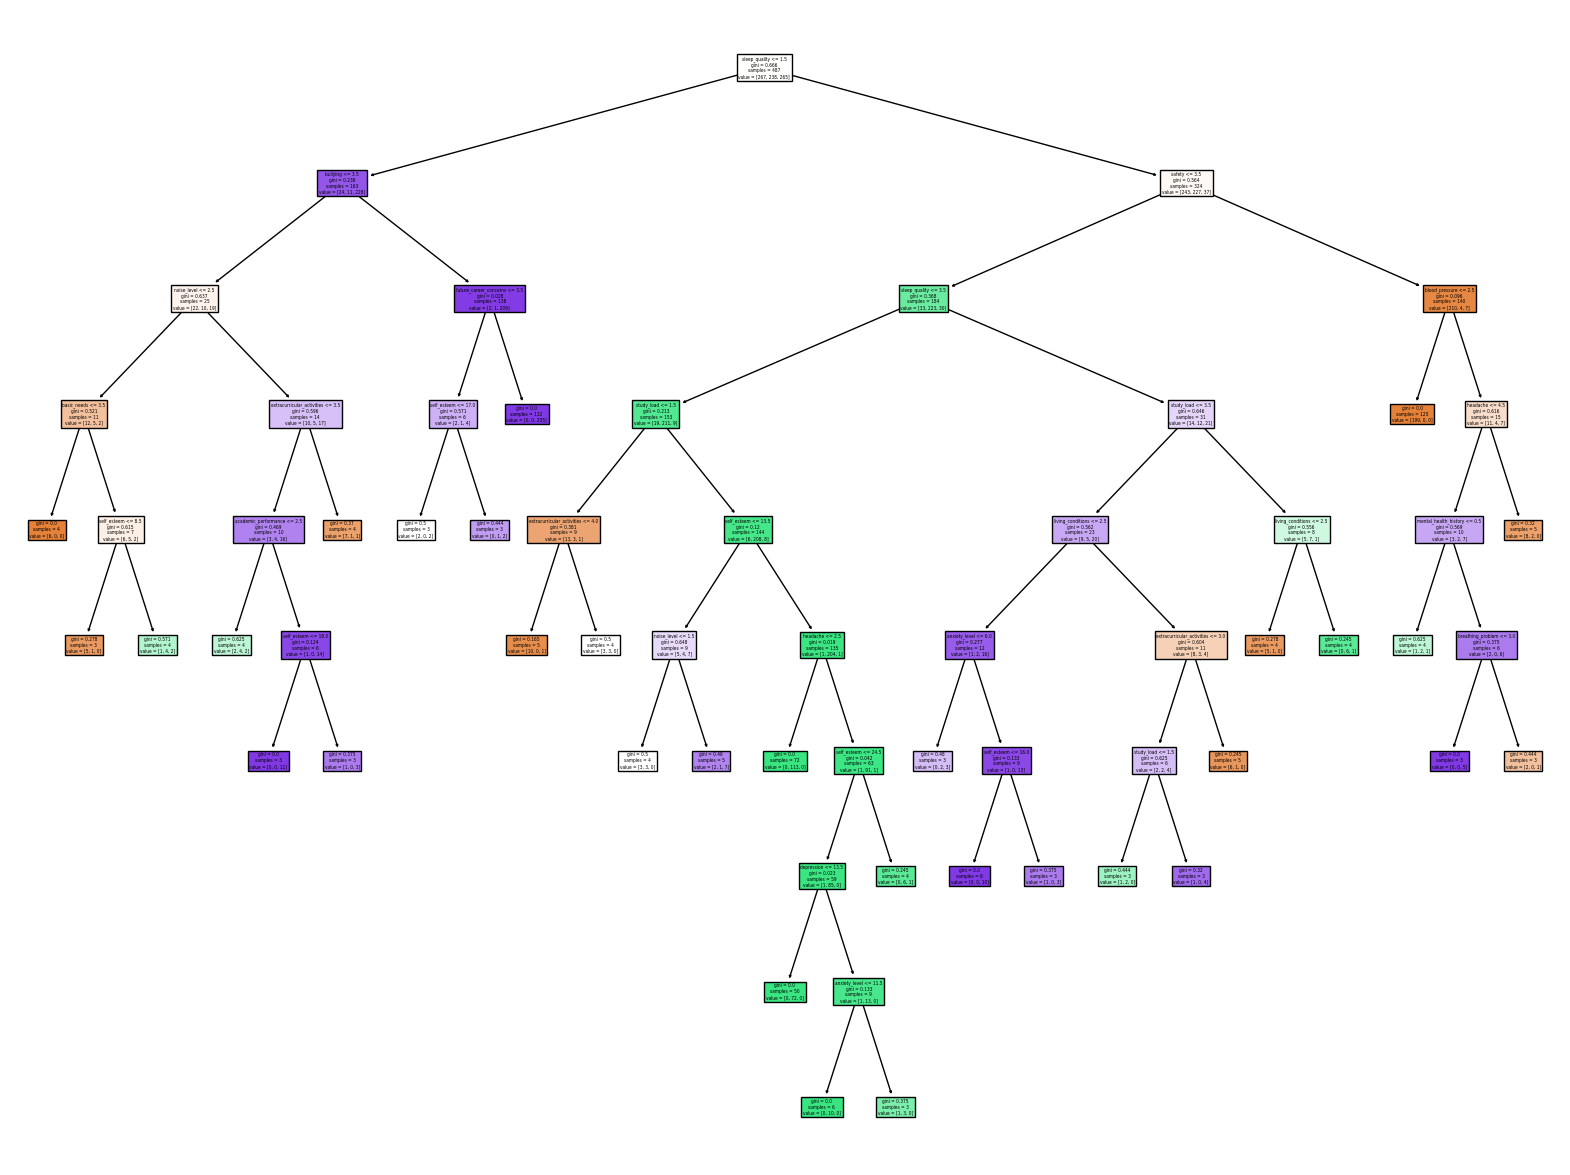

In [389]:
rf = RandomForestClassifier(n_estimators=10, max_depth=15, min_samples_leaf=3, random_state=42)

rf.fit(x_train, y_train)
rf_predictions = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

feature_names_list = list(x.columns)

#Visualize indv. decision tree, as pulled from rf model:
plt.figure(figsize=(20, 15))
tree.plot_tree(rf[0], feature_names=feature_names_list, filled=True)
plt.show()

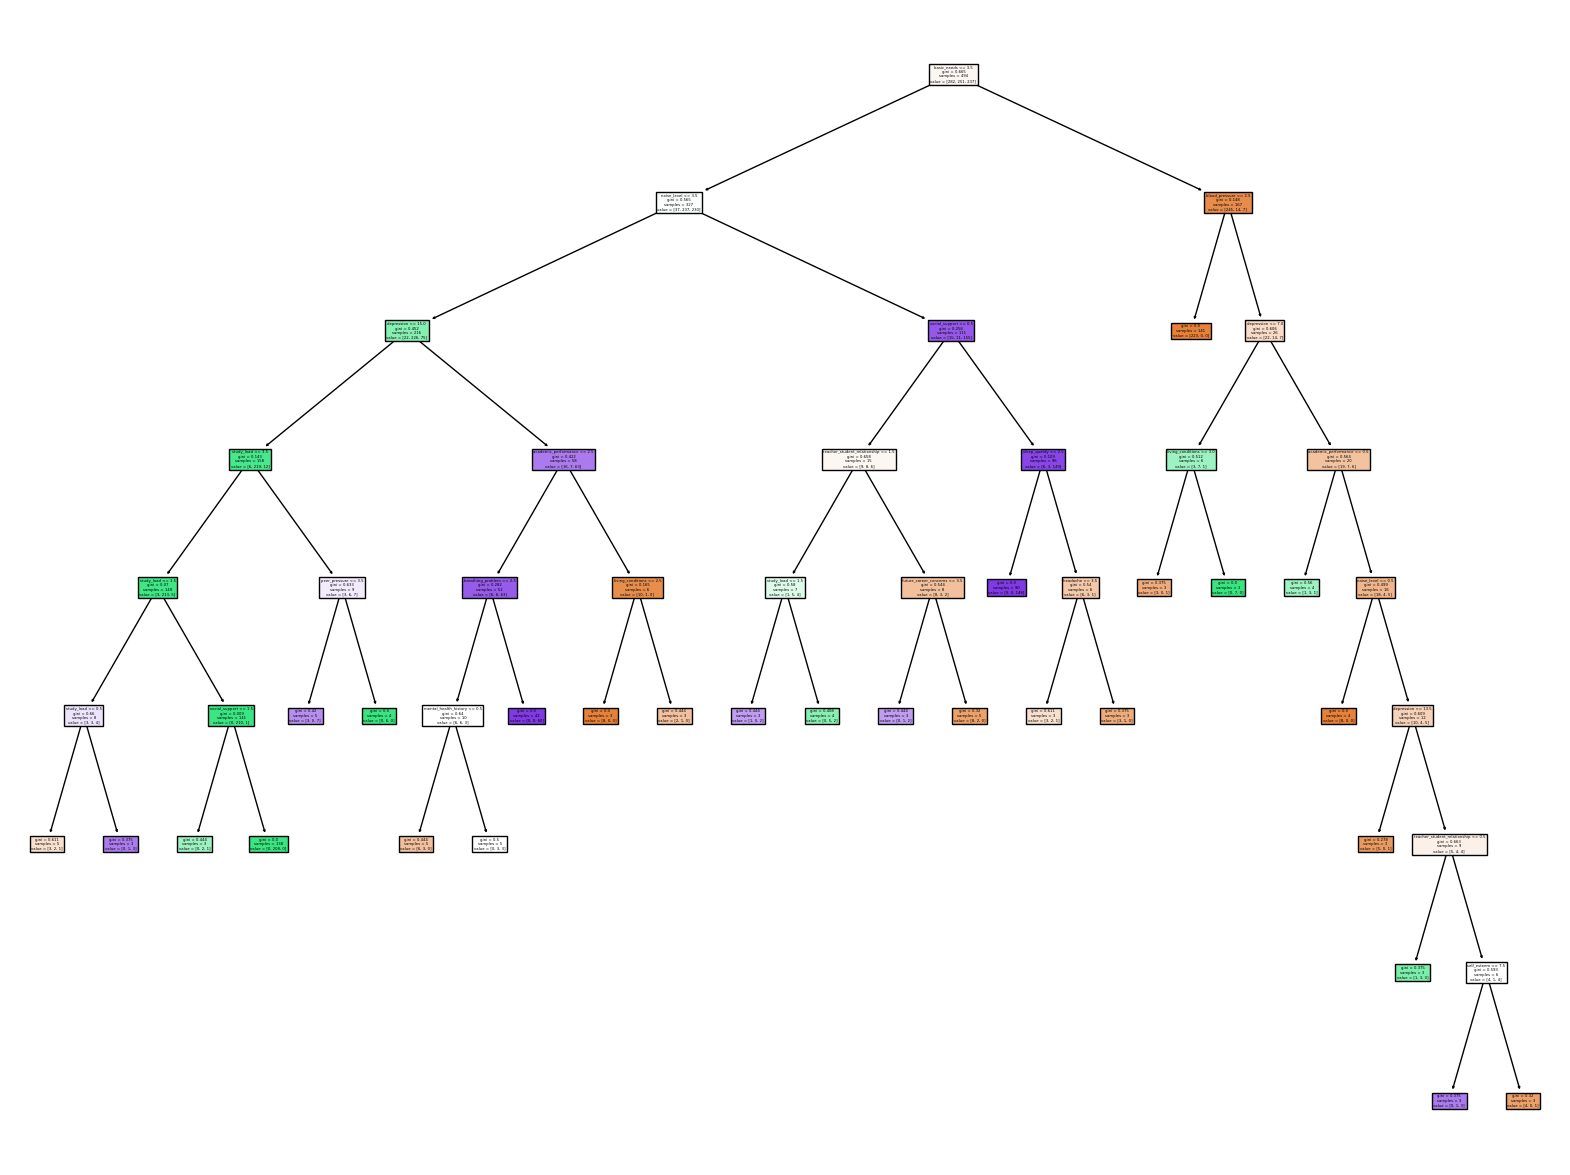

In [426]:
#Visualize indv. decision tree, as pulled from rf model:
plt.figure(figsize=(20, 15))
tree.plot_tree(rf[1], feature_names=feature_names_list, filled=True)
plt.show()

Feature ranking:
1. Feature 5 (0.2139551090306679)
2. Feature 6 (0.19647134107127295)
3. Feature 3 (0.08611061432429848)
4. Feature 1 (0.061464143864538426)
5. Feature 8 (0.056445383777726975)
6. Feature 15 (0.0464552296911992)
7. Feature 12 (0.04524154462359684)
8. Feature 19 (0.045222772876556475)
9. Feature 18 (0.04452113366095784)
10. Feature 10 (0.04409742295857989)
11. Feature 17 (0.041210293826487)
12. Feature 11 (0.022738196978429853)
13. Feature 16 (0.020309166865233805)
14. Feature 4 (0.02009893374733206)
15. Feature 13 (0.0181485691267565)
16. Feature 0 (0.010346894797060368)
17. Feature 14 (0.00835822194364962)
18. Feature 7 (0.007948135947506308)
19. Feature 9 (0.006196060788072977)
20. Feature 2 (0.004660830100076552)


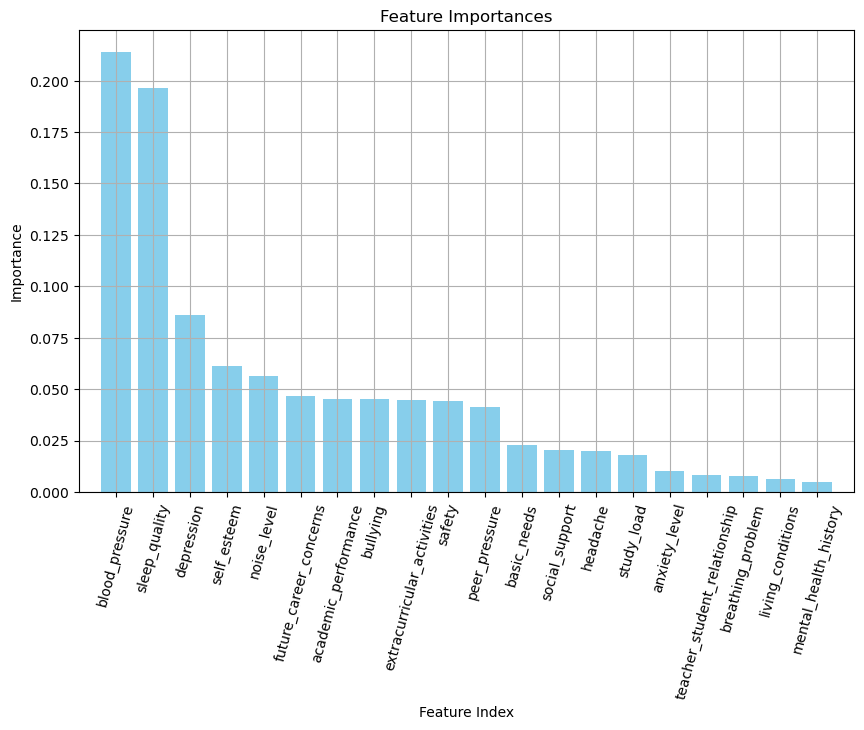

Index(['blood_pressure', 'sleep_quality', 'depression', 'self_esteem',
       'noise_level', 'future_career_concerns', 'academic_performance',
       'bullying', 'extracurricular_activities', 'safety', 'peer_pressure',
       'basic_needs', 'social_support', 'headache', 'study_load',
       'anxiety_level', 'teacher_student_relationship', 'breathing_problem',
       'living_conditions', 'mental_health_history'],
      dtype='object')


In [380]:
# Get feature importances from the trained model
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(x_train.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(x_train.shape[1]), df.columns[indices], rotation=75)
plt.xlim([-1, x_train.shape[1]])
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.grid()
plt.show()

print(df.columns[indices])

Analysis:
Students involved with extracurricular activities are predicted to have lower stress
Coinciding with our correlation matrix, students who’ve experienced bullying or low self esteem are associated with higher stress levels.
